In [3]:
import pandas as pd
import numpy as np
import json
from scipy.stats import entropy
from tqdm import tqdm
import json
import pickle
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
import os


# utility function to display topics
def topics_df(model, bar=0.005, num_words=40):
    """
    Use this method to display topics in one DataFrame

    @param
    model: input model 
    bar: threshold of word frequency 
    num_words: number of words for each topic
    """
    topics = {}
    for idx, item in model.print_topics(num_words=num_words):
        idx += 1
        topic = []
        for num, j in zip(re.findall(r'\s(0.0[0-9]{2})\*', item),re.findall('\"([a-zA-Z]+)\"', item)):
            
            # set the threshold
            if float(num) >= bar:
                topic.append(j)
        topics[f'Topic{idx}'] = ', '.join(topic)

    # create the dataframe 
    df = pd.DataFrame(topics.values(), columns=['Terms per Topic'], index=topics.keys())
    return df

In [29]:
# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5.pickle", "rb") as fp:
    lda_5 = pickle.load(fp)

# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=8.pickle", "rb") as fp:
    lda_8 = pickle.load(fp)

# load doc_lda
with open("./topic modeling for PMC/data/saved_results/corpus/lda_doc_lda_k=8.pickle", "rb") as fp:
    doc_lda = pickle.load(fp)
    
# load article seq
with open("./topic modeling for PMC/data/saved_results/data_words/article_sq_pmd.pickle", "rb") as fp:
    article_sq_pmd = pickle.load(fp)

In [30]:
# load doc_lda
with open("../topic modeling/data/saved_results/model/lda_k=5_abstract.pickle", "rb") as fp:
    lda_5_acs = pickle.load(fp)
    
# load doc_lda
with open("../topic modeling/data/saved_results/corpus/lda_k=5_abstract_doc_lda.pickle", "rb") as fp:
    doc_lda_acs = pickle.load(fp)
    
# load article seq
with open("../topic modeling/data/saved_results/data_words/article_sq.pickle", "rb") as fp:
    article_sq_acs = pickle.load(fp)

# Approach 1: Topic Matching
- match the topics of ACS articles and Pubmed articles (ran two topic models)

In [31]:
topics_df(lda_8, bar = 0.008).iloc[5:]

,Terms per Topic
Topic6,"gene, genome, dna, bacteria, method, bacterial, engineered, natural, circuit, antibiotic, strain"
Topic7,"cell, expression, gene, vector, dna, genome, large, clone, specific, site, locus, recombination, seamless, generate, stem, protein"
Topic8,"synbio, frame, debate, biotechnology, innovation, event, societal, social, context, analysis, engagement"


In [32]:
topics_df(lda_5_acs,bar=0.002,num_words=20)

,Terms per Topic
Topic1,"mrna, terminator, repression, GFP, strength, ribosome, rb, membrane, IPTG, strains, RBS, supplementary, core, yeast, translational, intensity, bp"
Topic2,"light, domain, activation, ligand, ion, fusion, switch, sensor, receptor, ed, GFP, mCherry, intensity, mammalian, membrane, dark, human, surface"
Topic3,"biosynthesis, titer, metabolite, carbon, fermentation, flux, compound, deletion, biosynthetic, biosensor, strains, fatty, heterologous, intracellular, recombinant, overexpression"
Topic4,"circuit, network, output, input, behavior, gate, strand, device, simulation, module, algorithm, noise, distribution, degradation, population, logic, switch, domain, feedback"
Topic5,"yeast, cassette, tRNA, residue, bp, CRISPR, recombination, cluster, DNA, incorporation, transformation, ligation, editing, integration, peptide, chromosome, assembled"


**Match ethics t-6 -> acs t-4 (circuit)**

**Match ethics t-7 -> acs t-5 (dna)**

**Match ethics t-8 -> acs t-3 (synbio)**

### Matching each article ID with its topic distribution

In [46]:
doc = {}
for n,d in enumerate(article_sq_pmd):
    doc[article_sq_pmd[n]] = doc_lda[n]

doc_dict = {k:[doc[k][i][1] for i in range(8)] for k in doc}
doc_dict

doc_dict_ethics = {k: [doc_dict[k][5], doc_dict[k][6], doc_dict[k][7]] for k in doc_dict}
doc_dict_ethics

{'pmid30850636': [0.17312008978675647,
  0.09680134680134682,
  0.10970819304152639],
 'pmid23810468': [0.12724014336917566,
  0.10430107526881721,
  0.11146953405017923],
 'pmc3513596': [0.03418959500040581,
  0.012803343884424966,
  0.05334388442496551],
 'pmid21484320': [0.08407605466428997,
  0.07872846108140227,
  0.1339869281045752],
 'pmid28049282': [0.25540641312453394,
  0.16070096942580164,
  0.09433258762117823],
 'pmid22699939': [0.12831858407079647,
  0.11061946902654868,
  0.13323500491642085],
 'pmid26363557': [0.12423687423687424,
  0.10347985347985347,
  0.10225885225885226],
 'pmid28920015': [0.13902989283699943,
  0.08601240834743373,
  0.14749012972363226],
 'pmid16538811': [0.12644853442399454,
  0.08623040218132243,
  0.14758009543285616],
 'pmc6287201': [0.18537037037037038,
  0.08077777777777778,
  0.039592592592592596],
 'pmid31448268': [0.08047138047138047, 0.08787878787878788, 0.168013468013468],
 'pmid29581172': [0.11671763506625892,
  0.11773700305810397,
 

In [47]:
doc = {}
for n,d in enumerate(article_sq_acs):
    doc[article_sq_acs[n]] = doc_lda_acs[n]

doc_dict_acs = {k:[doc[k][3][1], doc[k][4][1], doc[k][2][1]] for k in doc}
doc_dict_acs

{'sb9b00393': [0.16455793267387472, 0.04861590368836746, 0.3332566520972319],
 'sb6b00301': [0.6599022168642421, 0.026522001205545504, 0.01915477864844953],
 'sb7b00200': [0.032975579405817385,
  0.047130191320578614,
  0.06175143879296934],
 'sb7b00129': [0.014756488772236804, 0.009798775153105862, 0.931350247885681],
 'sb6b00028': [0.136331569664903, 0.22200176366843033, 0.014109347442680775],
 'sb8b00011': [0.12355603191616053, 0.6083720376324878, 0.18065975943789447],
 'sb5b00119': [0.05617138804911732,
  0.025342440189601766,
  0.012018064419811146],
 'sb3000436': [0.026043443648356646,
  0.30042837105273135,
  0.009818416164373176],
 'sb400176e': [0.6898895497026338, 0.21032757481355613, 0.022373265363919568],
 'sb8b00380': [0.027760641579272053, 0.02803482075536363, 0.884296387689355],
 'sb500267d': [0.11182680264805869, 0.7032862169738177, 0.11665772052245482],
 'sb5b00230': [0.150627835813021, 0.049963068481587, 0.033976996939959904],
 'sb6b00205': [0.028872752420470268, 0.098

### Using Kullback-Leibler Divergence Score

In [41]:
list_of_divergence_score = []
for key in doc_dict_ethics:
    node = doc_dict_ethics[key]
    for k in doc_dict_acs:
            value = entropy(node, doc_dict_acs[k])
            list_of_divergence_score.append(value)

(array([7.8795e+04, 5.7960e+04, 3.6673e+04, 1.7326e+04, 5.8340e+03,
        1.4250e+03, 4.1000e+02, 1.4800e+02, 5.0000e+01, 1.2000e+01]),
 array([7.97216966e-06, 5.11686375e-01, 1.02336478e+00, 1.53504318e+00,
        2.04672158e+00, 2.55839998e+00, 3.07007839e+00, 3.58175679e+00,
        4.09343519e+00, 4.60511359e+00, 5.11679200e+00]),
 <a list of 10 Patch objects>)

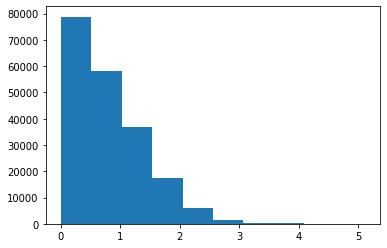

In [42]:
plt.hist(list_of_divergence_score)

### Using Jensen-Shannon Divergence Score

In [52]:
from scipy.spatial.distance import jensenshannon
# This is another version of Kullback-Leibler Divergence Score except that this is symmetric and normalized

(array([ 4342., 12224., 23357., 34695., 39330., 41124., 33073.,  8474.,
         1375.,   639.]),
 array([0.00169616, 0.09504567, 0.18839517, 0.28174468, 0.37509418,
        0.46844369, 0.56179319, 0.6551427 , 0.7484922 , 0.84184171,
        0.93519121]),
 <a list of 10 Patch objects>)

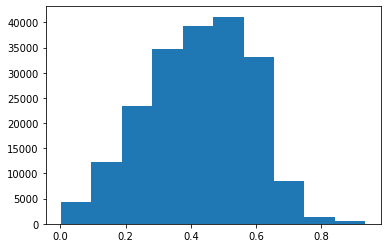

In [53]:
list_of_js = []
for key in doc_dict_ethics:
    node = doc_dict_ethics[key]
    for k in doc_dict_acs:
            value = jensenshannon(node, doc_dict_acs[k],2)
            list_of_js.append(value)
plt.hist(list_of_js)

In [54]:
np.percentile(list_of_js, 0.1)

0.019530130059345972

In [55]:
# Find the closest pair among all possible pairs of ethics article --> acs article; default using top 1 percent
def find_closest_in_acs(doc_dict_ethics, doc_dict_acs, threshold = np.percentile(list_of_js, q=1)):
    similar_dict = {}
    for key in tqdm(doc_dict_ethics):
        node = doc_dict_ethics[key]
        for k in doc_dict_acs:
            
            if jensenshannon(node, doc_dict_acs[k],2) <= threshold:
                similar_dict[key] = k

    return similar_dict

In [60]:
similar_dict_acs = find_closest_in_acs(doc_dict_ethics, doc_dict_acs, 0.1) # picked top 0.1%

100%|██████████| 219/219 [00:04<00:00, 44.24it/s]


In [61]:
similar_dict_acs

{'pmid30850636': 'sb5b00090',
 'pmid23810468': 'sb5000115',
 'pmc3513596': 'sb5b00073',
 'pmid21484320': 'sb7b00297',
 'pmid28049282': 'sb6b00011',
 'pmid22699939': 'sb7b00297',
 'pmid26363557': 'sb5000115',
 'pmid28920015': 'sb7b00297',
 'pmid16538811': 'sb7b00297',
 'pmc6287201': 'sb6b00011',
 'pmid31448268': 'sb7b00297',
 'pmid29581172': 'sb7b00297',
 'pmid31029103': 'sb5b00090',
 'pmid29174176': 'sb5000115',
 'pmid23502567': 'sb7b00297',
 'pmid32122265': 'sb8b00481',
 'pmc3396840': 'sb8b00356',
 'pmid29928050': 'sb8b00252',
 'pmid29453841': 'sb7b00297',
 'pmid22586841': 'sb7b00297',
 'pmid19816800': 'sb7b00297',
 'pmid33123514': 'sb5000115',
 'pmid28692329': 'sb6b00011',
 'pmid29221460': 'sb500270h',
 'pmid24010856': 'sb8b00252',
 'pmid30777520': 'sb5002938',
 'pmid28567486': 'sb5b00090',
 'pmid26833578': 'sb7b00297',
 'pmid29761363': 'sb8b00252',
 'pmid27138379': 'sb8b00045',
 'pmid29900853': 'sb5000115',
 'pmid24602164': 'sb7b00297',
 'pmid29672769': 'sb7b00297',
 'pmid32722674':

In [62]:
compare_df = pd.DataFrame({'ACS_title':[], 'abstract_2':[], 'keywords_acs':[], 'Pubmed_title':[], 'abstract_1':[]})

In [63]:
for a,b in similar_dict_acs.items():
    with open('./topic modeling for PMC/data/json-files/{}.json'.format(a), 'r') as f:
        pubmed = json.load(f)
        pubmed_title = pubmed['title']
        pub_abst = pubmed['abstract']
        
    with open('../topic modeling/data/json-files/{}.json'.format(b), 'r') as f:
        acs = json.load(f)
        acs_title = acs['article_title']
        acs_keys = acs['keywords']
        acs_absr = ''.join(acs['abstract'])
    compare_df = compare_df.append({'Pubmed_title':pubmed_title, 'keywords_acs':acs_keys, 'abstract_1':pub_abst,'ACS_title':acs_title,'abstract_2':acs_absr}, ignore_index=True)

In [58]:
#compare_df.to_excel('top_similar_comparison.xlsx')

In [49]:
# df = pd.DataFrame()
# df['article_id'] = similar_dict_acs.keys()
# df['similar_article'] = similar_dict_acs.values()
# df.to_csv('ethics_similar_acs.csv', index=False, header=False)

In [64]:
compare_df

,ACS_title,abstract_2,keywords_acs,Pubmed_title,abstract_1
0,Engineering Transcriptional Regulator Effector Specificity Using Computational Design and In Vitro Rapid Prototyping: Developing a Vanillin Sensor,"The pursuit of circuits and metabolic pathways of increasing complexity and robustness in synthetic biology will require engineering new regulatory tools.Feedback control based on relevant molecules, including toxic intermediates and environmental signals, would enable genetic circuits to react appropriately to changing conditions.In this work, variants of qacR, a tetR family repressor, were generated by computational protein design and screened in a cell-free transcription–translation (TX-TL) system for responsiveness to a new targeted effector.The modified repressors target vanillin, a growth-inhibiting small molecule found in lignocellulosic hydrolysates and other industrial processes.Promising candidates from the in vitro screen were further characterized in vitro and in vivo in a gene circuit.The screen yielded two qacR mutants that respond to vanillin both in vitro and in vivo.While the mutants exhibit some toxicity to cells, presumably due to off-target effects, they are prime starting points for directed evolution toward vanillin sensors with the specifications required for use in a dynamic control loop.We believe this process, a combination of the generation of variants coupled with in vitro screening, can serve as a framework for designing new sensors for other target compounds.","[synthetic biology, cell-free systems, in vitro biological circuit prototyping, computational protein design, protein engineering, TX-TL]",Global monitoring of antimicrobial resistance based on metagenomics analyses of urban sewage.,"Antimicrobial resistance (AMR) is a serious threat to global public health, but obtaining representative data on AMR for healthy human populations is difficult. Here, we use metagenomic analysis of untreated sewage to characterize the bacterial resistome from 79 sites in 60 countries. We find systematic differences in abundance and diversity of AMR genes between Europe/North-America/Oceania and Africa/Asia/South-America. Antimicrobial use data and bacterial taxonomy only explains a minor part of the AMR variation that we observe. We find no evidence for cross-selection between antimicrobial classes, or for effect of air travel between sites. However, AMR gene abundance strongly correlates with socio-economic, health and environmental factors, which we use to predict AMR gene abundances in all countries in the world. Our findings suggest that global AMR gene diversity and abundance vary by region, and that improving sanitation and health could potentially limit the global burden of AMR. We propose metagenomic analysis of sewage as an ethically acceptable and economically feasible approach for continuous global surveillance and prediction of AMR."
1,Preventing T7 RNA Polymerase Read-through TranscriptionA Synthetic Termination Signal Capable of Improving Bioprocess Stability,"The phage-derived T7 RNA polymerase is the most prominent orthogonal transcriptions system used in the field of synthetic biology.However, gene expression driven by T7 RNA polymerase is prone to read-through transcription due to contextuality of the T7 terminator.The native T7 terminator has a termination efficiency of approximately 80% and therefore provides insufficient insulation of the expression unit.By using a combination of a synthetic T7 termination signal with two well-known transcriptional terminators (rrnBT1 and T7), we have been able to increase the termination efficiency to 99%.To characterize putative effects of an enhanced termination signal on product yield and process stability, industrial-relevant fed batch cultivations have been performed.Fermentation of a E. coli HMS174(DE3) strain carrying a pET30a derivative containing the improved termination signal showed a significant decrease of plasmid copy number (PCN) and a

# Approach 2: Compare Direct Reference Overlaps

In [65]:
with open('references_acs.json', 'r') as f:
    dict_acs = json.load(f)
with open('references_pubmed.json', 'r') as f:
    dict_pubmed = json.load(f)

In [66]:
set_acs = set([j for sublist in list(dict_acs.values()) for j in sublist])
set_pubmed = set([j for sublist in list(dict_pubmed.values()) for j in sublist])

In [67]:
set_acs.intersection(set_pubmed)

{'https://doi.org/10.1002/anie.202006941',
 'https://doi.org/10.1007/s00253-015-6963-9',
 'https://doi.org/10.1007/s00294-020-01143-2',
 'https://doi.org/10.1007/s10295-018-2056-y',
 'https://doi.org/10.1007/s10295-020-02321-4',
 'https://doi.org/10.1007/s10529-020-03042-5',
 'https://doi.org/10.1007/s11693-013-9106-6',
 'https://doi.org/10.1007/s12551-017-0376-1',
 'https://doi.org/10.1016/bs.ircmb.2016.01.003',
 'https://doi.org/10.1016/j.gene.2016.11.008',
 'https://doi.org/10.1016/j.isci.2021.102505',
 'https://doi.org/10.1016/j.omtn.2020.10.007',
 'https://doi.org/10.1016/j.synbio.2017.07.004',
 'https://doi.org/10.1016/j.synbio.2020.07.006',
 'https://doi.org/10.1016/j.synbio.2021.04.003',
 'https://doi.org/10.1016/j.techfore.2018.11.020',
 'https://doi.org/10.1016/j.tibtech.2020.12.006',
 'https://doi.org/10.1021/acs.chemrev.7b00287',
 'https://doi.org/10.1021/acschembio.0c00713',
 'https://doi.org/10.1021/acssynbio.0c00210',
 'https://doi.org/10.1021/acssynbio.0c00214',
 'https

In [82]:
overlaps = []
for i1, c1 in tqdm(dict_acs.items()):
    for i2, c2 in dict_pubmed.items():
        if len(set(c1).intersection(set(c2))) > 0:
            overlaps.append((i1, i2, set(c1).intersection(set(c2))))

100%|██████████| 907/907 [00:00<00:00, 4909.26it/s]


**Percentage of overlapped pairs**

In [83]:
all_num_pairs = len(dict_acs.keys())*len(dict_pubmed.keys())
all_num_pairs

181400

In [84]:
num_overlaps = len(overlaps)
num_overlaps

255

In [85]:
num_overlaps/all_num_pairs * 100

0.14057331863285555

In [86]:
overlaps = [(len(l[2]),l[0],l[1],l[2]) for l in overlaps]
overlaps

[(2,
  '10.1021/acssynbio.9b00393',
  'pmid30925042',
  {'https://doi.org/10.1016/j.synbio.2020.07.006',
   'https://doi.org/10.1038/s41467-021-22329-3'}),
 (1,
  '10.1021/acssynbio.8b00115',
  'pmid24622617',
  {'https://doi.org/10.3389/fbioe.2020.00092'}),
 (1,
  '10.1021/acssynbio.8b00512',
  'pmid29197394',
  {'https://doi.org/10.1371/journal.pcbi.1007849'}),
 (3,
  '10.1021/acssynbio.8b00007',
  'pmid29243094',
  {'https://doi.org/10.1038/s41598-021-86952-2',
   'https://doi.org/10.1098/rsfs.2018.0068',
   'https://doi.org/10.3390/bios10050051'}),
 (1,
  '10.1021/acssynbio.7b00451',
  'pmid31397921',
  {'https://doi.org/10.2903/j.efsa.2020.6297'}),
 (1,
  '10.1021/acssynbio.7b00001',
  'pmid26260156',
  {'https://doi.org/10.3389/fbioe.2020.00399'}),
 (1,
  '10.1021/acssynbio.7b00001',
  'pmid30925042',
  {'https://doi.org/10.1021/acssynbio.0c00210'}),
 (1,
  '10.1021/acssynbio.7b00001',
  'pmid24622617',
  {'https://doi.org/10.3389/fbioe.2020.00399'}),
 (1,
  '10.1021/acssynbio.9b

In [87]:
overlaps.sort(reverse=True)

In [88]:
overlaps

[(9,
  '10.1021/acssynbio.8b00381',
  'pmid30925042',
  {'https://doi.org/10.1007/s10295-020-02321-4',
   'https://doi.org/10.1016/j.synbio.2020.07.006',
   'https://doi.org/10.1016/j.synbio.2021.04.003',
   'https://doi.org/10.1021/acssynbio.0c00210',
   'https://doi.org/10.1038/s41467-021-22329-3',
   'https://doi.org/10.1038/s41587-021-00950-3',
   'https://doi.org/10.3389/fbioe.2020.00941',
   'https://doi.org/10.3389/fmolb.2021.639587',
   'https://doi.org/10.3390/life11060551'}),
 (3,
  '10.1021/acssynbio.9b00178',
  'pmid30925042',
  {'https://doi.org/10.1016/j.synbio.2020.07.006',
   'https://doi.org/10.1038/s41467-021-22329-3',
   'https://doi.org/10.3390/life11060551'}),
 (3,
  '10.1021/acssynbio.8b00430',
  'pmid30925042',
  {'https://doi.org/10.1007/s10295-020-02321-4',
   'https://doi.org/10.1016/j.synbio.2020.07.006',
   'https://doi.org/10.3390/life11060551'}),
 (3,
  '10.1021/acssynbio.8b00007',
  'pmid29243094',
  {'https://doi.org/10.1038/s41598-021-86952-2',
   'http

In [89]:
from collections import defaultdict

In [90]:
df = pd.DataFrame(columns=['ACS Id', 'ACS Topic 1', 'ACS Topic 2','ACS Topic 3', 'Ethics Id','Ethics Topic 1', 'Ethics Topic 2','Ethics Topic 3','Number of Shared Citations', 'Normalized Citation Number' ,'Jensen-Shannan Divergence', '1-Jensen-Shannan Divergence','Weighted Scores'])

direct_ref_pairs = defaultdict(list)
for l in overlaps:
    try:
        temp = l[1].split('/')[-1].split('.')[-1]
        if temp.startswith('sb'):
            acs_a = temp
        else:
            acs_a = 'sb'+l[1].split('/')[-1].split('.')[-1]
    except:
        pubmed_a = l[1].split('/')[-1]
    pubmed_a = l[2]
    acs_dict = np.array(doc_dict_acs[acs_a])/sum(doc_dict_acs[acs_a])
    pubmed_dict = np.array(doc_dict_ethics[pubmed_a])/sum(doc_dict_ethics[pubmed_a])
    direct_ref_pairs[acs_a].append(pubmed_a)
    j_s_score = jensenshannon(acs_dict, pubmed_dict,2)
    weighted_score = (l[0] - 0)/9 * 0.6 + (1-j_s_score) * 0.4
    
    df = (df.append({'ACS Id':acs_a, 'ACS Topic 1': acs_dict[0],
               'ACS Topic 2': acs_dict[1],
               'ACS Topic 3': acs_dict[2],
               'Ethics Id':pubmed_a, 'Ethics Topic 1': pubmed_dict[0],
                'Ethics Topic 2': pubmed_dict[1],
                'Ethics Topic 3': pubmed_dict[2],
                   'Number of Shared Citations': l[0],
                     'Normalized Citation Number': (l[0] - 0)/9,
                    'Jensen-Shannan Divergence': j_s_score,
                     '1-Jensen-Shannan Divergence': 1-j_s_score,
                    'Weighted Scores': weighted_score},
                ignore_index=True))
    

In [91]:
#df.to_csv('acs_ethics_overlap_topic_comparison.csv')

In [92]:
df

,ACS Id,ACS Topic 1,ACS Topic 2,ACS Topic 3,Ethics Id,Ethics Topic 1,Ethics Topic 2,Ethics Topic 3,Number of Shared Citations,Normalized Citation Number,Jensen-Shannan Divergence,1-Jensen-Shannan Divergence,Weighted Scores
0,sb8b00381,0.532423,0.377986,0.089590,pmid30925042,0.376187,0.266618,0.357195,9,1.000000,0.280355,0.719645,0.887858
1,sb9b00178,0.876025,0.055264,0.068711,pmid30925042,0.376187,0.266618,0.357195,3,0.333333,0.453513,0.546487,0.418595
2,sb8b00430,0.716079,0.117576,0.166345,pmid30925042,0.376187,0.266618,0.357195,3,0.333333,0.293053,0.706947,0.482779
3,sb8b00007,0.203773,0.698862,0.097365,pmid29243094,0.534533,0.283807,0.181660,3,0.333333,0.360529,0.639471,0.455788
4,sb500234s,0.288853,0.265993,0.445153,pmid26260156,0.310564,0.237490,0.451946,2,0.222222,0.029741,0.970259,0.521437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,sb5b00062,0.509909,0.457614,0.032477,pmid21601681,0.334157,0.353922,0.311921,1,0.111111,0.335683,0.664317,0.332393
251,sb5b00051,0.926627,0.044568,0.028805,pmid29862436,0.258662,0.236100,0.505238,1,0.111111,0.618005,0.381995,0.219465
252,sb5b00051,0.926627,0.044568,0.028805,pmid19816800,0.341359,0.246776,0.411866,1,0.111111,0.548233,0.451767,0.247373
253,sb5b00016,0.036164,0.510469,0.453367,pmid27903825,0.404550,0.305638,0.289812,1,0.111111,0.402462,0.597538,0.305682


In [93]:
direct_ref_pairs

defaultdict(list,
            {'sb8b00381': ['pmid30925042', 'pmid24432149'],
             'sb9b00178': ['pmid30925042', 'pmid32050455'],
             'sb8b00430': ['pmid30925042'],
             'sb8b00007': ['pmid29243094'],
             'sb500234s': ['pmid26260156',
              'pmid22699939',
              'pmid28567486',
              'pmid26085442'],
             'sb9b00393': ['pmid30925042'],
             'sb9b00022': ['pmid29581172'],
             'sb7b00403': ['pmid24622617',
              'pmid29596055',
              'pmid28567486',
              'pmid26260156'],
             'sb7b00383': ['pmid26260156', 'pmid30925042', 'pmid24622617'],
             'sb7b00219': ['pmid26260156', 'pmid24622617'],
             'sb6b00397': ['pmid29581172'],
             'sb6b00337': ['pmid29221460'],
             'sb6b00083': ['pmid26260156', 'pmid24622617'],
             'sb6b00040': ['pmid22699939', 'pmid33344779', 'pmid31029103'],
             'sb5b00199': ['pmid29221460'],
             '

In [94]:
for key,val in similar_dict_acs.items():
    if key in direct_ref_pairs[val]:
        print(key, val)
    print(key, direct_ref_pairs[val])

pmid30850636 ['pmid19857142']
pmid23810468 ['pmid24622617']
pmc3513596 []
pmid21484320 []
pmid28049282 []
pmid22699939 []
pmid26363557 ['pmid24622617']
pmid28920015 []
pmid16538811 []
pmc6287201 []
pmid31448268 []
pmid29581172 []
pmid31029103 ['pmid19857142']
pmid29174176 ['pmid24622617']
pmid23502567 []
pmid32122265 []
pmc3396840 []
pmid29928050 ['pmid30925042', 'pmid27836667']
pmid29453841 []
pmid22586841 []
pmid19816800 []
pmid33123514 ['pmid24622617']
pmid28692329 []
pmid29221460 []
pmid24010856 ['pmid30925042', 'pmid27836667']
pmid30777520 []
pmid28567486 ['pmid19857142']
pmid26833578 []
pmid29761363 ['pmid30925042', 'pmid27836667']
pmid27138379 []
pmid29900853 ['pmid24622617']
pmid24602164 []
pmid29672769 []
pmid32722674 []
pmid31183944 []
pmid24010857 []
pmid27325057 []
pmc5712322 []
pmid19816801 []
pmc7373080 []
pmc6919543 []
pmid24432149 ['pmid19857142']
pmid16408063 ['pmid24622617']
pmid33633695 ['pmid19857142']
pmid28746757 ['pmid24622617']
pmid27144921 []
pmid28392848 []
pm

## Approach 3: Combine corpus and Run as a single Topic Model

In [61]:
# Load Model
with open("./topic modeling for ACS-Pubmed/data/saved_results/model/lda_combined_k=7.pickle", "rb") as fp:
    lda_7 = pickle.load(fp)
    
with open("./topic modeling for ACS-Pubmed/data/saved_results/model/lda_combined_k=8.pickle", "rb") as fp:
    lda_8 = pickle.load(fp)
    

# load doc_lda
with open("./topic modeling for ACS-Pubmed/data/saved_results/corpus/lda_doc_lda_combined_k=7.pickle", "rb") as fp:
    lda_7_doc = pickle.load(fp)
    
# load doc_lda
with open("./topic modeling for ACS-Pubmed/data/saved_results/corpus/lda_doc_lda_combined_k=8.pickle", "rb") as fp:
    lda_8_doc = pickle.load(fp)
    
    
# load article seq
with open("./topic modeling for ACS-Pubmed/data/saved_results/data_words/article_sq.pickle", "rb") as fp:
    article_sq = pickle.load(fp)

In [62]:
topics_df(lda_7, bar=0.004)

,Terms per Topic
Topic1,"glucose, mg, carbon, flux, titer, fermentation, biosynthesis, fatty, extract"
Topic2,"peptide, domain, light, variant, fusion, membrane, affinity, residue, antibody, surface, ligand, secretion, activation"
Topic3,"circuit, output, input, network, behavior, population, gate, device, switch, noise, simulation, degradation, gfp, repressor, feedback"
Topic4,"membrane, sensor, droplet, electron"
Topic5,"codon, sbol, variant, trna, algorithm, feature, module, class, search"
Topic6,"mrna, terminator, gfp, repression, translation, integration, clone, yeast, rb, variant, cassette, bp, targeting"
Topic7,"cluster, yeast, biosensor, chromosome, biosynthetic, cassette, module, compound, operon, heterologous, metabolite"


In [63]:
topics_df(lda_8, bar=0.005)

,Terms per Topic
Topic1,"gfp, rb, induction, repression, terminator, mrna, variant, biosensor, inducer, strength, upstream, iptg, operator"
Topic2,"yeast, cassette, integration, clone, recombination, chromosome, genomic, deletion, locus, bp, crispr, editing, sgrna, cluster"
Topic3,"sbol, algorithm, module"
Topic4,"translation, trna, membrane, extract, codon, vitro, ribosome, droplet"
Topic5,"variant, residue, peptide, base, domain, codon, compound, specificity, mutagenesis"
Topic6,"glucose, mg, biosynthesis, titer, carbon, fermentation, flux, metabolite"
Topic7,"light, fusion, domain, membrane, peptide, supernatant, antibody"
Topic8,"circuit, output, input, network, behavior, population, gate, simulation, device, noise, degradation, switch"


**We will select k=7 topic model and run the topic distribution for each article**

## Perform Similarity Calculation

In [64]:
doc = {}
for n,d in enumerate(article_sq):
    doc[article_sq[n]] = lda_7_doc[n]

doc_dict = {k:[doc[k][i][1] for i in range(7)] for k in doc}
doc_dict

{'sb9b00393': [0.18412698412698408,
  0.04150675195451314,
  0.0738450604122246,
  0.3863657900971334,
  0.13769248993129585,
  0.08860459606728263,
  0.0878583274105662],
 'sb6b00301': [0.017445574721116516,
  0.04386456336920734,
  0.30915524104378594,
  0.04400216226841615,
  0.45012531328320815,
  0.09690893901420215,
  0.03849820630006389],
 'sb7b00200': [0.08678447771932189,
  0.1452043707001214,
  0.08092989792706506,
  0.03100858851567067,
  0.050209092135437755,
  0.5766176536714781,
  0.029245919330905167],
 'sb7b00129': [0.8722426888616001,
  0.02302269522899896,
  0.021239823532087147,
  0.020221039705280396,
  0.017737754127438946,
  0.016464274343930507,
  0.029071724200664034],
 'sb6b00028': [0.02532247871826326,
  0.45738076651425597,
  0.09797405300918179,
  0.08553585368573656,
  0.13861938217910114,
  0.16151815917623877,
  0.03364930671722241],
 'sb8b00011': [0.6238509149364213,
  0.04275799666945817,
  0.1496914917169617,
  0.0476094217755831,
  0.0299556248616285,

In [65]:
doc_dict_acs = {k: doc_dict[k] for k in doc_dict if k.startswith('sb')}

In [66]:
doc_dict_ethics = {k: doc_dict[k] for k in doc_dict if k.startswith('p')}

100%|██████████| 219/219 [00:05<00:00, 42.79it/s]


(array([1.3000e+01, 7.7100e+02, 4.7020e+03, 1.6399e+04, 3.4450e+04,
        5.3590e+04, 5.7576e+04, 2.3229e+04, 5.8200e+03, 2.0830e+03]),
 array([0.00641586, 0.09729512, 0.18817437, 0.27905362, 0.36993287,
        0.46081212, 0.55169137, 0.64257062, 0.73344987, 0.82432913,
        0.91520838]),
 <a list of 10 Patch objects>)

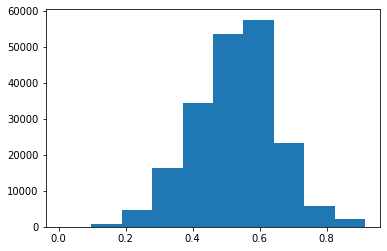

In [67]:
from scipy.spatial.distance import jensenshannon


list_of_js = []
for key in tqdm(doc_dict_ethics):
    node = doc_dict_ethics[key]
    for k in doc_dict_acs:
        value = jensenshannon(node, doc_dict_acs[k],2)
        list_of_js.append(value)
plt.hist(list_of_js)

In [104]:
def find_closest_in_acs(doc_dict_ethics, doc_dict_acs, threshold = np.percentile(list_of_js, q=1)):
    similar_dict = {}
    for key in tqdm(doc_dict_ethics):
        node = doc_dict_ethics[key]
        for k in doc_dict_acs:
            
            if jensenshannon(node, doc_dict_acs[k],2) <= threshold:
                similar_dict[key] = k

    return similar_dict

def find_most_divergent_in_acs(doc_dict_ethics, doc_dict_acs, threshold = np.percentile(list_of_js, q=99.9)):
    diff_dict = {}
    for key in tqdm(doc_dict_ethics):
        node = doc_dict_ethics[key]
        for k in doc_dict_acs:
            
            if jensenshannon(node, doc_dict_acs[k],2) >= threshold:
                diff_dict[key] = k

    return diff_dict

In [69]:
similar_dict_acs = find_closest_in_acs(doc_dict_ethics, doc_dict_acs, 0.1)

100%|██████████| 219/219 [00:05<00:00, 41.56it/s]


## Topic similar (least divergent) Pairs

In [70]:
similar_dict_acs

{'pmid33633695': 'sb7b00219',
 'pmid33199860': 'sb7b00219',
 'pmid24006130': 'sb9b00348',
 'pmid33333069': 'sb9b00348',
 'pmid26496614': 'sb9b00348',
 'pmid31088375': 'sb9b00348',
 'pmc6463046': 'sb8b00025',
 'pmid27017007': 'sb7b00219',
 'pmc5851096': 'sb6b00339',
 'pmc5097395': 'sb9b00237',
 'pmid32172182': 'sb9b00348'}

In [71]:
compare_df = pd.DataFrame({'ACS_title':[], 'abstract_2':[], 'keywords_acs':[], 'Pubmed_title':[], 'abstract_1':[]})

In [72]:
import json
for a,b in similar_dict_acs.items():
    with open('./topic modeling for ACS-Pubmed/data/json-files/{}.json'.format(a), 'r') as f:
        pubmed = json.load(f)
        pubmed_title = pubmed['title']
        pub_abst = pubmed['abstract']
        
    with open('../topic modeling/data/json-files/{}.json'.format(b), 'r') as f:
        acs = json.load(f)
        acs_title = acs['article_title']
        acs_keys = acs['keywords']
        acs_absr = ''.join(acs['abstract'])
    compare_df = compare_df.append({'Pubmed_title':pubmed_title, 'keywords_acs':acs_keys, 'abstract_1':pub_abst,'ACS_title':acs_title,'abstract_2':acs_absr}, ignore_index=True)

In [73]:
doc_dict_acs['sb7b00219'], doc_dict_ethics['pmid33633695']

([0.1256531598146505,
  0.09994577541161395,
  0.22097752144335997,
  0.22598097209898454,
  0.10745095139505077,
  0.08407275953859808,
  0.13591886029774228],
 [0.10476190476190476,
  0.09802789802789805,
  0.16132756132756132,
  0.28051948051948056,
  0.12765752765752764,
  0.10745550745550744,
  0.12025012025012023])

In [74]:
jensenshannon(doc_dict_acs['sb7b00219'], doc_dict_ethics['pmid33633695'],2)

0.09049177436002623

## Most similar table

In [75]:
compare_df

,ACS_title,abstract_2,keywords_acs,Pubmed_title,abstract_1
0,A Cell-Free Biosensor for Detecting Quorum Sensing Molecules in P. aeruginosa-Infected Respiratory Samples,"Synthetic biology designed cell-free biosensors are a promising new tool for the detection of clinically relevant biomarkers in infectious diseases.Here, we report that a modular DNA-encoded biosensor in cell-free protein expression systems can be used to measure a bacterial biomarker of Pseudomonas aeruginosa infection from human sputum samples.By optimizing the cell-free system and sample extraction, we demonstrate that the quorum sensing molecule 3-oxo-C12-HSL in sputum samples from cystic fibrosis lungs can be quantitatively measured at nanomolar levels using our cell-free biosensor system, and is comparable to LC–MS measurements of the same samples.This study further illustrates the potential of modular cell-free biosensors as rapid, low-cost detection assays that can inform clinical practice.","[Pseudomonas aeruginosa, cystic fibrosis, quorum sensing, cell-free synthetic biology, biosensor]",Translating New Synthetic Biology Advances for Biosensing Into the Earth and Environmental Sciences.,"The rapid diversification of synthetic biology tools holds promise in making some classically hard-to-solve environmental problems tractable. Here we review longstanding problems in the Earth and environmental sciences that could be addressed using engineered microbes as micron-scale sensors (biosensors). Biosensors can offer new perspectives on open questions, including understanding microbial behaviors in heterogeneous matrices like soils, sediments, and wastewater systems, tracking cryptic element cycling in the Earth system, and establishing the dynamics of microbe-microbe, microbe-plant, and microbe-material interactions. Before these new tools can reach their potential, however, a suite of biological parts and microbial chassis appropriate for environmental conditions must be developed by the synthetic biology community. This includes diversifying sensing modules to obtain information relevant to environmental questions, creating output signals that allow dynamic reporting from hard-to-image environmental materials, and tuning these sensors so that they reliably function long enough to be useful for environmental studies. Finally, ethical questions related to the use of synthetic biosensors in environmental applications are discussed."
1,A Cell-Free Biosensor for Detecting Quorum Sensing Molecules in P. aeruginosa-Infected Respiratory Samples,"Synthetic biology designed cell-free biosensors are a promising new tool for the detection of clinically relevant biomarkers in infectious diseases.Here, we report that a modular DNA-encoded biosensor in cell-free protein expression systems can be used to measure a bacterial biomarker of Pseudomonas aeruginosa infection from human sputum samples.By optimizing the cell-free system and sample extraction, we demonstrate that the quorum sensing molecule 3-oxo-C12-HSL in sputum samples from cystic fibrosis lungs can be quantitatively measured at nanomolar levels using our cell-free biosensor system, and is comparable to LC–MS measurements of the same samples.This study further illustrates the potential of modular cell-free biosensors as rapid, low-cost detection assays that can inform clinical practice.","[Pseudomonas aeruginosa, cystic fibrosis, quorum sensing, cell-free synthetic biology, biosensor]",Rethinking organoid technology through bioengineering.,"In recent years considerable progress has been made in the development of faithful procedures for the differentiation of human pluripotent stem cells (hPSCs). An important step in this direction has also been the derivation of organoids. This technology generally relies on traditional three-dimensional culture techniques that exploit cell-autonomous self-organization responses of hPSCs with minimal control over the external inputs supplied to the system. The convergence of s

## Topic different (most divergent) Pairs

In [80]:
diff_dict_acs = find_most_divergent_in_acs(doc_dict_ethics, doc_dict_acs, 0.9)

100%|██████████| 219/219 [00:05<00:00, 42.55it/s]


In [81]:
diff_dict_acs

{'pmc3513596': 'sb7b00144',
 'pmc7411530': 'sb7b00144',
 'pmc5851096': 'sb8b00522',
 'pmc6267378': 'sb7b00144',
 'pmc2671589': 'sb7b00144'}

In [83]:
compare_diff_df = pd.DataFrame({'ACS_title':[], 'abstract_2':[], 'keywords_acs':[], 'Pubmed_title':[], 'abstract_1':[]})
for a,b in diff_dict_acs.items():
    with open('./topic modeling for ACS-Pubmed/data/json-files/{}.json'.format(a), 'r') as f:
        pubmed = json.load(f)
        pubmed_title = pubmed['title']
        pub_abst = pubmed['abstract']
        
    with open('../topic modeling/data/json-files/{}.json'.format(b), 'r') as f:
        acs = json.load(f)
        acs_title = acs['article_title']
        acs_keys = acs['keywords']
        acs_absr = ''.join(acs['abstract'])
    compare_diff_df = compare_diff_df.append({'Pubmed_title':pubmed_title, 'keywords_acs':acs_keys, 'abstract_1':pub_abst,'ACS_title':acs_title,'abstract_2':acs_absr}, ignore_index=True)

## Most Different Table

In [84]:
compare_diff_df

,ACS_title,abstract_2,keywords_acs,Pubmed_title,abstract_1
0,Inefficient Ribosomal Skipping Enables Simultaneous Secretion and Display of Proteins in Saccharomyces cerevisiae,"The need for recombinant expression of soluble protein slows the validation of engineered proteins isolated from combinatorial libraries and limits the number of protein variants evaluated.To overcome this bottleneck, we describe a system for simultaneous cell surface display and soluble secretion of proteins in based on inefficient ribosomal skipping.Ribosomal skipping mediated by “self-cleaving” 2A peptides produces two proteins from a single open reading frame.Incorporation of the F2A peptide sequencewith ∼50% efficiency of ribosomal skippingbetween the protein of interest and the yeast cell wall protein Aga2 results in simultaneous expression of both the solubly secreted protein and the protein–Aga2 fusion that is tethered to the yeast cell surface.We show that binding proteins derived from the Sso7d scaffold and the homodimeric enzyme glucose oxidase can be simultaneously secreted solubly and expressed as yeast cell surface fusions using the F2A-based system.Furthermore, a combinatorial library of Sso7d mutants can be screened to isolate binders with higher affinity for a model target (lysozyme), and the pool of higher affinity binders can be characterized in soluble form.Significantly, we show that both N-and C-terminal fusions to Aga2 can be simultaneously secreted solubly and displayed on the cell surface; this is particularly advantageous because protein functionality can be affected by the specific position of Aga2 in the protein fusion.We expect that the F2A-based yeast surface display and secretion system will be a useful tool for protein engineering and enable efficient characterization of individual clones isolated from combinatorial libraries.","[yeast surface display, secretion, ribosomal skipping, 2A peptide, Sso7d, glucose oxidase]","Possibilities, Intentions and Threats: Dual Use in the Life Sciences Reconsidered","Due to the terrorist attacks of 9/11 and the anthrax letters of a few weeks later, the concept of dual use has spread widely in the life sciences during the past decade. This article is aimed at a clarification of the dual use concept and its scope of application for the life sciences. Such a clarification would greatly facilitate the work of policymakers seeking to ensure security while avoiding undesirable interventions of government in the conduct of science. The article starts with an overview of the main developments in life sciences in relation to dual use. This is illustrated by discussions on synthetic biology and dual use. The findings lead to a reconsideration of the dual use concept. An area in need of further attention is to what extent threats and intentions should have impact on the definition of dual use. Possible threats are analyzed against the background of the phenomenon of securitization of health care and life sciences: considering these sectors of society in security terms. Some caveats that should be taken into account in a dual use policy are described. An acceptable, adequate and applicable definition of the dual use concept could help researchers, universities, companies and policy makers. Such a definition should build upon, but go beyond, the view developed in the influential Fink-report, which concentrates on the so-called ‘experiments of concern’, e.g. experiments that enhance the virulence of pathogens (National Research Council of the National Academies) It will be argued that—in addition to these more technical aspects—a definition of dual use should include the aspect of threats and intentions.\n"
1,Inefficient Ribosomal Skipping Enables Simultaneous Secretion and Display of Proteins in Saccharomyces cerevisiae,"The need for recombinant expression of soluble protein slows the validation of engineered proteins isolated from combinatorial libraries and limits the number of protein variants e

# Approach 3.1 Using single topic model but with all abstracts
- approach 3 had ACS as full text + abstract

In [86]:
# Load Model
with open("./topic modeling for ACS-Pubmed/data/saved_results/model/lda_combined_abstracts_k=7.pickle", "rb") as fp:
    lda_7_abstracts = pickle.load(fp)


# load doc_lda
with open("./topic modeling for ACS-Pubmed/data/saved_results/corpus/lda_doc_lda_combined_abstracts_k=7.pickle", "rb") as fp:
    lda_7_doc = pickle.load(fp)
    
# load doc_lda
with open("./topic modeling for ACS-Pubmed/data/saved_results/corpus/lda_doc_lda_combined_abstracts_k=7.pickle", "rb") as fp:
    lda_7_doc = pickle.load(fp)
    
    
# load article seq
with open("./topic modeling for ACS-Pubmed/data/saved_results/data_words/article_sq_full.pickle", "rb") as fp:
    article_sq = pickle.load(fp)

In [87]:
topics_df(lda_7_abstracts, bar=0.007)

,Terms per Topic
Topic1,"rna, network, dynamic, regulatory, regulation, response, cellular, factor, transcriptional, signal, effect, molecular, behavior, device, interaction, reporter, output, state, population, parameter"
Topic2,"yield, increase, microbial, biosynthetic, biosynthesis, heterologous, produce, increased, metabolite, compound, titer, cerevisiae, produced, membrane"
Topic3,"research, technology, human, organism, ethical, living, field, challenge, principle, community, life, issue, future"
Topic4,"growth, reaction, number, rate, demonstrated, report, vitro, addition, artificial, amino, found, codon, translation, due, step, limited, compared, stability, substrate, pair, significantly"
Topic5,"genome, yeast, bacterial, functional, multiple, element, efficiency, host, plasmid, bacteria, large, type, efficient, vector, cluster, rapid, mammalian, modification, integration, crispr, light, specie"
Topic6,"data, assembly, part, set, platform, construction, experimental, information, order, component, applied, modular, effort, simple, required"
Topic7,"library, site, structure, variant, molecule, binding, module, designed, domain, small, mutation, screening, selection, vivo, peptide, sensor, highly, describe, evolution, characterized, combination, region, previously"


### Perform Similarity Calculation

In [88]:
doc = {}
for n,d in enumerate(article_sq):
    doc[article_sq[n]] = lda_7_doc[n]

doc_dict = {k:[doc[k][i][1] for i in range(7)] for k in doc}
doc_dict

{'sb9b00393': [0.082312925170068,
  0.17755102040816326,
  0.13786848072562358,
  0.10929705215419498,
  0.18178382464096748,
  0.1712018140589569,
  0.1399848828420257],
 'sb6b00301': [0.2627490712597096,
  0.09076325565687267,
  0.0943093549476528,
  0.15222897669706184,
  0.11558595069233367,
  0.15873015873015875,
  0.12563323201621074],
 'sb7b00200': [0.12976190476190477,
  0.13698412698412699,
  0.10531746031746032,
  0.15976190476190477,
  0.14865079365079367,
  0.1103174603174603,
  0.20920634920634926],
 'sb7b00129': [0.09783718555648377,
  0.3772393947832545,
  0.10108604845446947,
  0.1186299081035923,
  0.08549150654413815,
  0.1075837742504409,
  0.11213218230762088],
 'sb6b00028': [0.16607709750566893,
  0.10258503401360541,
  0.10131519274376415,
  0.09877551020408161,
  0.1457596371882086,
  0.15782312925170067,
  0.2276643990929705],
 'sb8b00011': [0.13999479573250065,
  0.21406886980657475,
  0.10113626507069129,
  0.14849509931477145,
  0.16367421285454076,
  0.11206

In [89]:
doc_dict_acs = {k: doc_dict[k] for k in doc_dict if k.startswith('sb')}

In [90]:
doc_dict_ethics = {k: doc_dict[k] for k in doc_dict if k.startswith('p')}

100%|██████████| 200/200 [00:04<00:00, 41.00it/s]


(array([2.1400e+02, 4.0560e+03, 1.5709e+04, 3.4147e+04, 4.9500e+04,
        4.5779e+04, 2.3868e+04, 6.9840e+03, 1.0940e+03, 4.9000e+01]),
 array([0.00787823, 0.06107747, 0.11427671, 0.16747595, 0.22067519,
        0.27387443, 0.32707367, 0.38027291, 0.43347215, 0.48667139,
        0.53987063]),
 <a list of 10 Patch objects>)

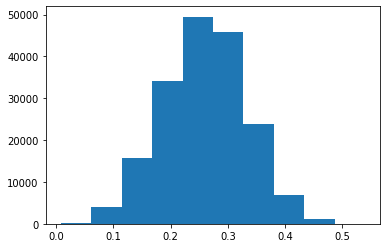

In [91]:
from scipy.spatial.distance import jensenshannon


list_of_js = []
for key in tqdm(doc_dict_ethics):
    node = doc_dict_ethics[key]
    for k in doc_dict_acs:
        value = jensenshannon(node, doc_dict_acs[k],2)
        list_of_js.append(value)
plt.hist(list_of_js)

In [92]:
def find_closest_in_acs(doc_dict_ethics, doc_dict_acs, threshold = np.percentile(list_of_js, q=1)):
    similar_dict = {}
    for key in tqdm(doc_dict_ethics):
        node = doc_dict_ethics[key]
        for k in doc_dict_acs:
            
            if jensenshannon(node, doc_dict_acs[k],2) <= threshold:
                similar_dict[key] = k

    return similar_dict

In [93]:
similar_dict_acs = find_closest_in_acs(doc_dict_ethics, doc_dict_acs, 0.05)

100%|██████████| 200/200 [00:04<00:00, 41.59it/s]


### Topic similar (least divergent) Pairs

In [94]:
similar_dict_acs

{'pmid23810468': 'sb8b00381',
 'pmid26363557': 'sb9b00077',
 'pmid28920015': 'sb8b00381',
 'pmid31448268': 'sb8b00381',
 'pmid29581172': 'sb6b00292',
 'pmid31029103': 'sb300084h',
 'pmid29761363': 'sb8b00381',
 'pmid28746757': 'sb8b00381',
 'pmid23502566': 'sb8b00381',
 'pmid32043291': 'sb6b00085',
 'pmid31399264': 'sb5b00226',
 'pmid28746761': 'sb8b00381',
 'pmid22907209': 'sb6b00085',
 'pmid30073396': 'sb8b00342',
 'pmid31088375': 'sb6b00271',
 'pmid24800469': 'sb8b00522',
 'pmid26260156': 'sb8b00381',
 'pmid30107853': 'sb5b00012',
 'pmid27325416': 'sb8b00381',
 'pmid22763004': 'sb8b00381',
 'pmid28799089': 'sb400139h',
 'pmid27836667': 'sb7b00399',
 'pmid28746766': 'sb8b00381',
 'pmid26208557': 'sb8b00381',
 'pmid26644292': 'sb8b00381',
 'pmid33344779': 'sb7b00268',
 'pmid30925042': 'sb8b00381',
 'pmid21535064': 'sb8b00381',
 'pmid30634968': 'sb400052f',
 'pmid28835345': 'sb8b00381',
 'pmid33476383': 'sb6b00085',
 'pmid32715543': 'sb6b00085',
 'pmid29197394': 'sb5b00243',
 'pmid1839

In [95]:
compare_df = pd.DataFrame({'ACS_title':[], 'abstract_2':[], 'keywords_acs':[], 'Pubmed_title':[], 'abstract_1':[]})

In [96]:
import json
for a,b in similar_dict_acs.items():
    with open('./topic modeling for ACS-Pubmed/data/json-files/{}.json'.format(a), 'r') as f:
        pubmed = json.load(f)
        pubmed_title = pubmed['title']
        pub_abst = pubmed['abstract']
        
    with open('../topic modeling/data/json-files/{}.json'.format(b), 'r') as f:
        acs = json.load(f)
        acs_title = acs['article_title']
        acs_keys = acs['keywords']
        acs_absr = ''.join(acs['abstract'])
    compare_df = compare_df.append({'Pubmed_title':pubmed_title, 'keywords_acs':acs_keys, 'abstract_1':pub_abst,'ACS_title':acs_title,'abstract_2':acs_absr}, ignore_index=True)

In [97]:
doc_dict_acs['sb7b00219'], doc_dict_ethics['pmid33633695']

([0.12425437266201597,
  0.110807805075321,
  0.11930037407744414,
  0.16600950358912142,
  0.12496208674552624,
  0.14336265291679304,
  0.21130320493377822],
 [0.2073085644514216,
  0.1224489795918367,
  0.21463457177742892,
  0.08459794174079889,
  0.11329147043432754,
  0.14137449851735565,
  0.11634397348683059])

In [98]:
jensenshannon(doc_dict_acs['sb7b00219'], doc_dict_ethics['pmid33633695'],2)

0.19427660164552604

In [99]:
compare_df

,ACS_title,abstract_2,keywords_acs,Pubmed_title,abstract_1
0,"BioBits Health: Classroom Activities Exploring Engineering, Biology, and Human Health with Fluorescent Readouts","Recent advances in synthetic biology have resulted in biological technologies with the potential to reshape the way we understand and treat human disease.Educating students about the biology and ethics underpinning these technologies is critical to empower them to make informed future policy decisions regarding their use and to inspire the next generation of synthetic biologists.However, hands-on, educational activities that convey emerging synthetic biology topics can be difficult to implement due to the expensive equipment and expertise required to grow living cells.We present BioBits Health, an educational kit containing lab activities and supporting curricula for teaching antibiotic resistance mechanisms and CRISPR-Cas9 gene editing in high school classrooms.This kit links complex biological concepts to visual, fluorescent readouts in user-friendly freeze-dried cell-free reactions.BioBits Health represents a set of educational resources that promises to encourage teaching of cutting-edge, health-related synthetic biology topics in classrooms and other nonlaboratory settings.","[cell-free protein synthesis, fluorescence, antibiotic resistance, CRISPR-Cas9, STEM curriculum, biological engineering education, synthetic biology]","Organism, machine, artifact: The conceptual and normative challenges of synthetic biology.","Synthetic biology is an emerging discipline that aims to apply rational engineering principles in the design and creation of organisms that are exquisitely tailored to human ends. The creation of artificial life raises conceptual, methodological and normative challenges that are ripe for philosophical investigation. This special issue examines the defining concepts and methods of synthetic biology, details the contours of the organism-artifact distinction, situates the products of synthetic biology vis-à-vis this conceptual typology and against historical human manipulation of the living world, and explores the normative implications of these conclusions. In addressing the challenges posed by emerging biotechnologies, new light can be thrown on old problems in the philosophy of biology, such as the nature of the organism, the structure of biological teleology, the utility of engineering metaphors and methods in biological science, and humankind's relationship to nature."
1,Metabolic Engineering of the MEP Pathway in Bacillus subtilis for Increased Biosynthesis of Menaquinone‑7,"Vitamin K is essential for blood coagulation and plays important roles in bone and cardiovascular health.Menaquinone-7 (MK-7) is one form of vitamin K that is especially useful due to its long half-life in the circulation.MK-7 is difficult to make via organic synthesis, and is thus commonly produced by fermentation.This study aimed to genetically modify Bacillus subtilis cultures to increase their MK-7 yield and reduce production costs.We constructed 12 different strains of B. subtilis 168 by overexpressing different combinations of the rate-limiting enzymes Dxs, Dxr, Idi, and MenA. We observed an 11-fold enhancement of production in the best-performing strain, resulting in 50 mg/L MK-7.Metabolite analysis revealed new bottlenecks in the pathway at IspG and IspH, which suggest avenues for further optimization.This work highlights the usefulness of Bacillus subtilis for industrial production of high value compounds.","[vitamin K, menaquinone-7, Bacillus subtilis, metabolic engineering, MEP pathway, biofilm formation]",Efflux systems in bacteria and their metabolic engineering applications.,"The production of valuable chemicals from metabolically engineered microbes can be limited by excretion from the cell. Efflux is often overlooked as a bottleneck in metabolic pathways, despite its impact on alleviating feedback inhibition and product toxicity. In the past, it ha

In [105]:
diff_dict_acs = find_most_divergent_in_acs(doc_dict_ethics, doc_dict_acs)
diff_dict_acs

100%|██████████| 200/200 [00:04<00:00, 43.75it/s]


{'pmid21484320': 'sb8b00130',
 'pmid29928050': 'sb7b00385',
 'pmid19816800': 'sb8b00130',
 'pmid27138379': 'sb8b00130',
 'pmid24602164': 'sb8b00130',
 'pmid27325057': 'sb8b00130',
 'pmid26160061': 'sb8b00130',
 'pmid32805036': 'sb8b00472',
 'pmid22160812': 'sb7b00385',
 'pmid26260156': 'sb8b00130',
 'pmid32085502': 'sb8b00130',
 'pmid25845210': 'sb8b00130',
 'pmid28361722': 'sb7b00222',
 'pmid23834596': 'sb8b00130',
 'pmid23520920': 'sb8b00130',
 'pmid29255953': 'sb8b00130',
 'pmid30125957': 'sb8b00130',
 'pmid25032403': 'sb7b00385',
 'pmid28979291': 'sb8b00472',
 'pmid26276449': 'sb8b00130',
 'pmid24973247': 'sb8b00130',
 'pmid32075446': 'sb8b00130',
 'pmid23502565': 'sb8b00130',
 'pmid28849542': 'sb8b00130',
 'pmid29453838': 'sb7b00385',
 'pmid22606757': 'sb8b00130',
 'pmid25185871': 'sb8b00130',
 'pmid32712668': 'sb7b00385',
 'pmid24872969': 'sb8b00130',
 'pmid29936670': 'sb8b00130',
 'pmid32442798': 'sb8b00130',
 'pmid31397921': 'sb8b00130',
 'pmid32309535': 'sb8b00130',
 'pmid2160

In [106]:
compare_diff_df = pd.DataFrame({'ACS_title':[], 'abstract_2':[], 'keywords_acs':[], 'Pubmed_title':[], 'abstract_1':[]})
for a,b in diff_dict_acs.items():
    with open('./topic modeling for ACS-Pubmed/data/json-files/{}.json'.format(a), 'r') as f:
        pubmed = json.load(f)
        pubmed_title = pubmed['title']
        pub_abst = pubmed['abstract']
        
    with open('../topic modeling/data/json-files/{}.json'.format(b), 'r') as f:
        acs = json.load(f)
        acs_title = acs['article_title']
        acs_keys = acs['keywords']
        acs_absr = ''.join(acs['abstract'])
    compare_diff_df = compare_diff_df.append({'Pubmed_title':pubmed_title, 'keywords_acs':acs_keys, 'abstract_1':pub_abst,'ACS_title':acs_title,'abstract_2':acs_absr}, ignore_index=True)

compare_diff_df

,ACS_title,abstract_2,keywords_acs,Pubmed_title,abstract_1
0,Synergistic Rewiring of Carbon Metabolism and Redox Metabolism in Cytoplasm and Mitochondria of Aspergillus oryzae for Increased l ‑Malate Production,"l-Malate is an important platform chemical that has extensive applications in the food, feed, and wine industries.Here, we synergistically engineered the carbon metabolism and redox metabolism in the cytosol and mitochondria of a previously engineered Aspergillus oryzae to further improve the l-malate titer and decrease the byproduct succinate concentration.First, the accumulation of the intermediate pyruvate was eliminated by overexpressing a pyruvate carboxylase from Rhizopus oryzae in the cytosol and mitochondria of A. oryzae, and consequently, the l-malate titer increased 7.5%.Then, malate synthesis via glyoxylate bypass in the mitochondria was enhanced, and citrate synthase in the oxidative TCA cycle was downregulated by RNAi, enhancing the l-malate titer by 10.7%.Next, the exchange of byproducts (succinate and fumarate) between the cytosol and mitochondria was regulated by the expression of a dicarboxylate carrier Sfc1p from Saccharomyces cerevisiae in the mitochondria, which increased l-malate titer 3.5% and decreased succinate concentration 36.8%.Finally, an NADH oxidase from Lactococcus lactis was overexpressed to decrease the NADH/NAD + ratio, and the engineered A. oryzae strain produced 117.2 g/L l-malate and 3.8 g/L succinate, with an l-malate yield of 0.9 g/g corn starch and a productivity of 1.17 g/L/h.Our results showed that synergistic engineering of the carbon and redox metabolisms in the cytosol and mitochondria of A. oryzae effectively increased the l-malate titer, while simultaneously decreasing the concentration of the byproduct succinate.The strategies used in our work may be useful for the metabolic engineering of fungi to produce other industrially important chemicals.","[l -malate, Aspergillus oryzae, redox metabolism, mitochondrial engineering]",The conception of life in synthetic biology.,"The phrase 'synthetic biology' is used to describe a set of different scientific and technological disciplines, which share the objective to design and produce new life forms. This essay addresses the following questions: What conception of life stands behind this ambitious objective? In what relation does this conception of life stand to that of traditional biology and biotechnology? And, could such a conception of life raise ethical concerns? Three different observations that provide useful indications for the conception of life in synthetic biology will be discussed in detail: 1. Synthetic biologists focus on different features of living organisms in order to design new life forms, 2. Synthetic biologists want to contribute to the understanding of life, and 3. Synthetic biologists want to modify life through a rational design, which implies the notions of utilising, minimising/optimising, varying and overcoming life. These observations indicate a tight connection between science and technology, a focus on selected aspects of life, a production-oriented approach to life, and a design-oriented understanding of life. It will be argued that through this conception of life synthetic biologists present life in a different light. This conception of life will be illustrated by the metaphor of a toolbox. According to the notion of life as a toolbox, the different features of living organisms are perceived as various rationally designed instruments that can be used for the production of the living organism itself or secondary products made by the organism. According to certain ethical positions this conception of life might raise ethical concerns related to the status of the organism, the motives of the scientists and the role of technology in our society."
1,Establishing an Artificial Pathway for Efficient Biosynthesis of Hydroxytyrosol,"Hydroxytyrosol (HT) is a valuable natural phenolic compound with strong anti